# Logistic Regression - Lab

### Part 1: Load  data

Import "bank-data.csv"

In [1]:
import pandas as pd
bank_data = pd.read_csv("bank-data.csv", sep=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Part 2: Preprocess data

Preprocess the dataset as you have done before

#### 2.1 Binary encoding

Use LabelEncoder to encode the following columns:
- y
- default
- housing
- loan

In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
bank_data['y'] = le.fit_transform(bank_data['y'])
bank_data['default'] = le.fit_transform(bank_data['default'])
bank_data['housing'] = le.fit_transform(bank_data['housing'])
bank_data['loan'] = le.fit_transform(bank_data['loan'])
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


#### 2.2 Convert categorical variables into dummy columns

(1) Use pd.get_dummies to convert the following categorical variales into dummy columns
- job
- maritial
- education
- contact
- month
- poutcome

(2) Drop columns that have been converted

In [3]:
# convert to dummy columns
dummy = pd.get_dummies(bank_data[['job', 'marital', 'education', 'contact', 'month', 'poutcome']])
bank_data = bank_data.drop(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], axis=1)
bank_data = bank_data.join(dummy)
bank_data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,1,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,1,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,30,329,5,-1,0,...,0,0,0,0,0,0,0,0,0,1
4517,57,1,-3313,1,1,9,153,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4518,57,0,295,0,0,19,151,11,-1,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,0,1137,0,0,6,129,4,211,3,...,0,0,0,0,0,0,0,1,0,0


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 49 columns):
age                    4521 non-null int64
default                4521 non-null int64
balance                4521 non-null int64
housing                4521 non-null int64
loan                   4521 non-null int64
day                    4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
y                      4521 non-null int64
job_admin.             4521 non-null uint8
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-null uint8
job_student            4521 non-null uint8
job_technician         4521 non-n

#### 2.3 Train/Test separation

Perform hold-out method
- 60% training set
- 40% testing set

In [5]:
# train, test data
bank_data_train = bank_data.sample(frac = 0.6)
bank_data_test = bank_data.drop(bank_data_train.index)
print(pd.crosstab(bank_data_train['y'],columns = 'count'))
print(pd.crosstab(bank_data_test['y'],columns = 'count'))

col_0  count
y           
0       2392
1        321
col_0  count
y           
0       1608
1        200


##### X/y separation

#### Description:
calculate mutual information for each column in dataframe used in selection the proper features for model predict y value.

In [6]:
from sklearn.feature_selection import mutual_info_classif

# calculate mutual information
mutualInfo = pd.DataFrame( zip(bank_data.drop(['y'], axis=1).columns
    ,mutual_info_classif(bank_data.drop(['y'], axis=1), bank_data['y'])
    ), columns = ['column name', 'mutual information']
).sort_values('mutual information',ascending = False)

print(mutualInfo)

            column name  mutual information
6              duration            0.074585
8                 pdays            0.026798
46     poutcome_success            0.021750
47     poutcome_unknown            0.018354
9              previous            0.018254
42            month_oct            0.015070
0                   age            0.010889
4                  loan            0.010795
3               housing            0.009895
2               balance            0.009007
40            month_may            0.006478
33            month_aug            0.006195
19       job_technician            0.006178
44     poutcome_failure            0.006150
31      contact_unknown            0.005984
36            month_jan            0.005765
15          job_retired            0.005359
5                   day            0.004736
29     contact_cellular            0.004616
25    education_primary            0.003588
32            month_apr            0.003460
13        job_housemaid         

In [7]:
from sklearn.preprocessing import StandardScaler

# select x and y
bankData_train_X = bank_data_train[['duration']]
bankData_train_y = bank_data_train['y']

bankData_test_X = bank_data_test[['duration']]
bankData_test_y = bank_data_test['y']

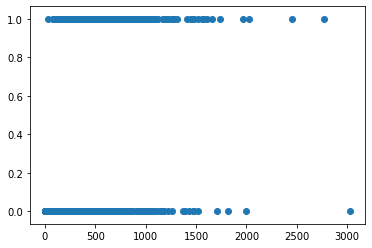

In [53]:
import matplotlib.pyplot as plt
plt.scatter(bankData_train_X,bankData_train_y)
plt.show()

## logistic Regression

### Part 3: Train a model

In [9]:
from sklearn import linear_model

lr = linear_model.LogisticRegression()
lr.fit(bankData_train_X, bankData_train_y)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
print(lr.coef_[0])

[0.00333799]


In [11]:
import numpy as np

feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())


lr_feature = pd.DataFrame({'feature':bankData_train_X.columns,
                             'Score':feature_importance})

lr_feature.sort_values(by = 'Score', ascending=False)

,feature,Score
0,duration,100.0


In [52]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = lr.predict(bankData_test_X)

print("Accuracy:\t %.3f" %accuracy_score(bankData_test_y, y_pred))
print("confusion matrix:\n",pd.crosstab(bankData_test_y, y_pred),end="\n\n")
print(classification_report(bankData_test_y, y_pred))

Accuracy:	 0.893
confusion matrix:
 col_0     0   1
y              
0      1584  24
1       170  30

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1608
           1       0.56      0.15      0.24       200

    accuracy                           0.89      1808
   macro avg       0.73      0.57      0.59      1808
weighted avg       0.86      0.89      0.86      1808



#### 2.4 Feature Scaling

It is always a good practice to scale the features so that all of them can be uniformly evaluated

In [13]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
train_X_scaled_s = pd.DataFrame(standard_scaler.fit_transform(bankData_train_X), columns=bankData_train_X.columns)
test_X_scaled_s = pd.DataFrame(standard_scaler.fit_transform(bankData_test_X), columns=bankData_train_X.columns)

min_max_scaler = preprocessing.MinMaxScaler()
train_X_scaled_m = pd.DataFrame(min_max_scaler.fit_transform(bankData_train_X),columns=bankData_train_X.columns)
test_X_scaled_m = pd.DataFrame(min_max_scaler.fit_transform(bankData_test_X),columns=bankData_train_X.columns)

In [14]:
train_X_scaled_s.head()

,duration
0,-0.696579
1,-0.509906
2,-0.342281
3,-0.829918
4,-0.368949


In [15]:
train_X_scaled_m.head()

,duration
0,0.026481
1,0.042701
2,0.057266
3,0.014896
4,0.054949


### Train a logistic regression model with the scaled data

and check the important variable again!

In [16]:
lr2 = linear_model.LogisticRegression()
lr2.fit(train_X_scaled_s, bankData_train_y)
print("Standard scaled model coef:",lr2.coef_[0])

lr3 = linear_model.LogisticRegression()
lr3.fit(train_X_scaled_m, bankData_train_y)
print("MinMax scaled model coef:",lr3.coef_[0])

Standard scaled model coef: [0.8862885]
MinMax scaled model coef: [7.28739537]


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Part 4: Model Evaluation

##### Prediction

In [17]:
y_pred2 = lr2.predict(test_X_scaled_s)
y_pred3 = lr3.predict(test_X_scaled_m)

Evaluation metrics
- confusion metrix
- accuracy
- precision, recall, f1-score

In [40]:
print("===================== Standard Scaler =====================")
print("confusion matrix:\n",pd.crosstab(bankData_test_y, y_pred2),end="\n\n")
print("Accuracy:\t %.3f" %accuracy_score(bankData_test_y, y_pred2))
print(classification_report(bankData_test_y, y_pred2))
print("===========================================================",end="\n\n")

print("====================== MinMax Scaler ======================")
print("confusion matrix:\n",pd.crosstab(bankData_test_y, y_pred3),end="\n\n")
print("Accuracy:\t %.3f" %accuracy_score(bankData_test_y, y_pred3))
print(classification_report(bankData_test_y, y_pred3))
print("===========================================================")

===================== Standard Scaler =====================
confusion matrix:
 col_0     0   1
y              
0      1579  29
1       170  30

Accuracy:	 0.890
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1608
           1       0.51      0.15      0.23       200

    accuracy                           0.89      1808
   macro avg       0.71      0.57      0.59      1808
weighted avg       0.86      0.89      0.86      1808


====================== MinMax Scaler ======================
confusion matrix:
 col_0     0   1
y              
0      1573  35
1       152  48

Accuracy:	 0.897
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1608
           1       0.58      0.24      0.34       200

    accuracy                           0.90      1808
   macro avg       0.75      0.61      0.64      1808
weighted avg       0.87      0.90      0.88      1808



### Part 5: Model tuning

#### Note:

After building the classifier, try answering the following questions.

1. What is the Accuracy Score?
2. If you change your preprosessing method, can you improve the model?
3. If you change your parameters setting, can you improve the model?

You can look at the parameters and functions of Logistic Regression at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

<b>Description:</b> cell below is coded for tuning the parameters of model to improve the model.

In [49]:
# train model
lr4 = linear_model.LogisticRegression(solver='sag', random_state = 50)
lr4.fit(train_X_scaled_s, bankData_train_y)
print("Standard scaled model coef:",lr4.coef_[0])

# predict
y_pred4 = lr4.predict(test_X_scaled_s)

# evaluate model
print("Accuracy:\t %.3f" %accuracy_score(bankData_test_y, y_pred4))
print("confusion matrix:\n",pd.crosstab(bankData_test_y, y_pred4))
print(classification_report(bankData_test_y, y_pred4))

Standard scaled model coef: [0.88962007]
Accuracy:	 0.891
confusion matrix:
 col_0     0   1
y              
0      1581  27
1       170  30
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1608
           1       0.53      0.15      0.23       200

    accuracy                           0.89      1808
   macro avg       0.71      0.57      0.59      1808
weighted avg       0.86      0.89      0.86      1808



<b> Q1: </b> What is the Accuracy Score? <br>
<b> A1: </b> Accuracy score is the score used to indicate the quality of model by focusing on the quantity of the correct predictions out of all predictions. For 4 above models, lr, lr2, lr3, lr4 have 0.893, 0.890, 0.897 and 0.891 accuracy respectively.

<b> Q2: </b> If you change your preprosessing method, can you improve the model? <br>
<b> A2: </b> Yes. As the comparison of above evaluation metrices, they indicate that the model had been trained by min/max scaled data resulted more reliability than the model had been trained by unscaled data.    

<b> Q3: </b> If you change your parameters setting, can you improve the model? <br>
<b> A3: </b> Yes. As there is no magic set of parameters that can suit for all type of data (which is used to construct the model). Therefore, chosing the proper set of parameters could affect more model reliability than using a default set of parameters. For example, compare model lr2 and lr4 with the same training set, the result shows that lr4 (with parameter tuning) has more accuracy than lr2 (with no parameter tuning).